## Este código es para hacer el análisis de los casos de estudio-
#### El análisis incluye: hietograma, seguimiento satelital, seguimiento sistemas convectivo hora (barras amarillas), buscar saturación de suelo. 

In [2]:

# #importamos las librerías a utilizar
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# import matplotlib.patches as mpatches
# import seaborn as sns 
# import datetime
# import calendar
# import matplotlib.dates as mdates
# import geopandas as gpd
# from shapely import wkt
# import matplotlib.pyplot as plt
# from pandas.plotting import table
# from datetime import timedelta
# import matplotlib.lines as mlines
# import matplotlib.patheffects as path_effects
# import matplotlib.colors as mcolors
# import xarray as xr
# import geodatasets

C:\Users\Miguel\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Miguel\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Miguel\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [4]:
# Dataframes necesarios
# #Archivo general MCS
# MCS= pd.read_csv('Datos_MCS/MCS_2001_2020.csv',sep=',', parse_dates=['time'])
# desastres_2001_2021=pd.read_csv('Datos_desastres/desastres_2001_2021.csv')
# MCS_desastres_3d = pd.read_csv('Resultados_dataframes/MCS_desastres_3d.csv.gz', compression='gzip',  dtype={5: str},  low_memory=False)
# #polígonos MCS categorizado por municipio de colombia
# MCS_pol_totales = pd.read_csv('Resultados_dataframes/MCS_pol_totales.csv.gz', compression='gzip')

In [6]:
# #El top 10 desastres con más fallecidos de 2001 a 2021 son estos:
# top_10_fallecidos = desastres_2001_2021.sort_values(by='FALLECIDOS', ascending=False).head(10)
# top_10_fallecidos

,ID_DESASTRES,FECHA,DEPTO,MUNICIPIO,TIPO_EVENTO,DIVIPOLA,FALLECIDOS,HERIDOS,DESAPA,AFECTADOS,FAMILIAS,VIV_DESTRU,VIV_AVERI,COD_DANE_MP,COD_DEP,COD_MUN,COD_DEP_MUN,ID_DESASTRES.1
20215,4357BJNI,2017-03-31,PUTUMAYO,MOCOA,AVENIDA TORRENCIAL,86001,332,398,77,22325,7893,0,1200,86.001,86,1,86001,4357BJNI
17864,1224OWBU,2015-05-18,ANTIOQUIA,SALGAR,AVENIDA TORRENCIAL,5642,93,62,11,1440,459,66,243,5.642,5,642,5642,1224OWBU
8657,2704XMWS,2010-12-05,ANTIOQUIA,BELLO,MOVIMIENTO EN MASA,5088,82,10,0,735,147,40,107,5.088,5,88,5088,2704XMWS
201,7762SEWM,2001-11-22,CALDAS,FILADELFIA,MOVIMIENTO EN MASA,0,51,32,14,0,0,0,0,17.272,17,272,17272,7762SEWM
11264,4872OYOR,2011-11-05,CALDAS,MANIZALES,MOVIMIENTO EN MASA,17001,48,14,0,83,35,14,3,17.001,17,1,17001,4872OYOR
2228,6707WBYR,2005-10-06,ANTIOQUIA,BELLO,MOVIMIENTO EN MASA,0,38,20,2,16,3,15,4,5.088,5,88,5088,6707WBYR
2830,5846ZMDC,2006-04-12,VALLE DEL CAUCA,BUENAVENTURA,MOVIMIENTO EN MASA,0,34,36,2,1042,201,72,0,76.109,76,109,76109,5846ZMDC
23257,5087SMYU,2019-04-21,CAUCA,ROSAS,MOVIMIENTO EN MASA,19622,32,5,0,115,35,6,32,19.622,19,622,19622,5087SMYU
5023,5941CCCR,2008-05-31,ANTIOQUIA,MEDELLÍN,MOVIMIENTO EN MASA,0,27,16,0,100,20,20,0,5.001,5,1,5001,5941CCCR
9460,9770VYDI,2011-04-13,CALDAS,MANIZALES,MOVIMIENTO EN MASA,17001,20,0,0,1025,205,11,194,17.001,17,1,17001,9770VYDI


In [7]:
# #El top 10 afectados de 2001 a 2021 son estos:

# top_10_afectados = desastres_2001_2021.sort_values(by='AFECTADOS', ascending=False).head(20)

# top_10_afectados

,ID_DESASTRES,FECHA,DEPTO,MUNICIPIO,TIPO_EVENTO,DIVIPOLA,FALLECIDOS,HERIDOS,DESAPA,AFECTADOS,FAMILIAS,VIV_DESTRU,VIV_AVERI,COD_DANE_MP,COD_DEP,COD_MUN,COD_DEP_MUN,ID_DESASTRES.1
25358,2269KSBP,2020-11-13,BOLÍVAR,CARTAGENA,INUNDACION,13001,3,0,0,150000,30000,14,3,13.001,13,1,13001,2269KSBP
11722,7452NVBU,2011-12-06,BOGOTÁ D.C.,BOGOTÁ D.C.,INUNDACION,11001,0,0,0,57540,11508,0,11508,11.001,11,1,11001,7452NVBU
7660,0331GZBN,2010-08-01,MAGDALENA,EL BANCO,INUNDACION,47245,0,0,0,40750,8150,0,1263,47.245,47,245,47245,0331GZBN
7643,9994OROD,2010-08-01,BOLÍVAR,MAGANGUÉ,INUNDACION,13430,0,0,0,39740,7948,0,7948,13.430,13,430,13430,9994OROD
13512,7101UODX,2012-07-18,PUTUMAYO,PUERTO ASÍS,INUNDACION,86568,1,0,0,39400,7880,106,64,86.568,86,568,86568,7101UODX
7734,6454JAMU,2010-08-16,CÓRDOBA,SAN PELAYO,INUNDACION,23686,0,0,0,39105,7821,0,1330,23.686,23,686,23686,6454JAMU
7760,7348HLUQ,2010-08-23,BOLÍVAR,MOMPOX,INUNDACION,13468,0,0,0,38099,10297,0,8592,13.468,13,468,13468,7348HLUQ
26817,4943NIZS,2021-06-09,MAGDALENA,ZONA BANANERA,INUNDACION,47980,0,0,0,37775,755,0,755,47.980,47,980,47980,4943NIZS
11197,4032NGRH,2011-10-21,SUCRE,SUCRE,INUNDACION,70771,0,0,0,37765,7553,0,7553,70.771,70,771,70771,4032NGRH
11592,7305EJOD,2011-11-29,LA GUAJIRA,RIOHACHA,INUNDACION,44001,0,0,0,37228,7635,9,124,44.001,44,1,44001,7305EJOD


## Para le análisis de cada caso de estudio decido hacerlo así:

###    -hietograma mpio ( o cercano): 30 días
###       -seguimiento satelital: 3 días
###       -seguimiento MCS: 30 días (puede compararse con hietograma y hacer acumulado de lluvia debido a MCS.

#### Por lo cual para mcs en desastres miro los 30 días antes del evento.

In [9]:
#Importo el shape que contiene los municipios de los desastres.

# casos_shp = gpd.read_file("Datos_desastres/mpios_colombia_2025.shp")
# casos_shp = casos_shp.to_crs("EPSG:4326") #reproyectar el shape a WGS84


In [10]:
#Obtener los sistemas que participaron en el desastre hasta 3 días antes (usando MCS_desastres_3d)

# #Determino el municipio del desastre y realizo la búsqueda

# # Asegurarse de que la columna 'FECHA' esté en formato datetime
# MCS_desastres_3d['FECHA'] = pd.to_datetime(MCS_desastres_3d['FECHA'])

# # Definir la fecha específica y el código del municipio
# fecha_especifica2 = pd.to_datetime('2015-05-18')
# codigo_mpio = 5642  # Reemplazar con el código de municipio deseado


# # Filtrar el DataFrame para las fechas dentro del rango y el municipio específico
# MCS_filtrado2 = MCS_desastres_3d[
#     (MCS_desastres_3d['FECHA'] == fecha_especifica2) &
#     (MCS_desastres_3d['cod_mpio'] == codigo_mpio)
# ]



In [11]:
# MCS_filtrado2[['FECHA','MUNICIPIO','TIPO_EVENTO','mean_p','max_p','time','track_id']]

,FECHA,MUNICIPIO,TIPO_EVENTO,mean_p,max_p,time,track_id
9983,2015-05-18,SALGAR,AVENIDA TORRENCIAL,7.7465,82.0023,2015-05-15 04:00:00,2f202da3-b608
9984,2015-05-18,SALGAR,AVENIDA TORRENCIAL,4.5657,31.3778,2015-05-16 20:00:00,a16b8b05-b06b
9985,2015-05-18,SALGAR,AVENIDA TORRENCIAL,5.6467,41.8034,2015-05-16 22:00:00,79a12031-47f7
9986,2015-05-18,SALGAR,AVENIDA TORRENCIAL,5.4863,33.3220,2015-05-16 23:00:00,79a12031-47f7
9987,2015-05-18,SALGAR,AVENIDA TORRENCIAL,6.4204,54.7400,2015-05-17 00:00:00,79a12031-47f7
9988,2015-05-18,SALGAR,AVENIDA TORRENCIAL,5.6164,38.7385,2015-05-17 01:00:00,79a12031-47f7
9989,2015-05-18,SALGAR,AVENIDA TORRENCIAL,5.8457,60.0534,2015-05-17 02:00:00,79a12031-47f7
9990,2015-05-18,SALGAR,AVENIDA TORRENCIAL,5.5721,20.2119,2015-05-18 22:00:00,1ec9f085-8b0b
9991,2015-05-18,SALGAR,AVENIDA TORRENCIAL,5.0156,38.7210,2015-05-18 23:00:00,1ec9f085-8b0b


### Realizo la gráfica de los MCS Satelite que estuvieron en el municipio del desastre hasta 3 días antes del desastre

In [13]:

# #Obtengo la geometría de los sistemas. NOTA: reiniciar kernel si sale error asociado a ste

# # Convertir la columna 'geometry' al tipo de datos geométricos de Shapely en ambos DataFrames
# MCS_filtrado2 = MCS_filtrado2.copy()
# MCS_filtrado2['geometry'] = MCS_filtrado2['geometry'].apply(wkt.loads)

# MCS = MCS.copy()
# MCS['geometry'] = MCS['geometry'].apply(wkt.loads)

# # Crear GeoDataFrames
# gdf_MCS_filtrado = gpd.GeoDataFrame(MCS_filtrado2, geometry='geometry', crs="EPSG:4326")
# gdf_MCS = gpd.GeoDataFrame(MCS, geometry='geometry', crs="EPSG:4326")

# # Obtener los track_id únicos en MCS_filtrado2
# track_ids = gdf_MCS_filtrado['track_id'].unique()

# # Filtrar MCS para obtener solo los polígonos correspondientes a esos track_id
# gdf_sistemas = gdf_MCS[gdf_MCS['track_id'].isin(track_ids)]

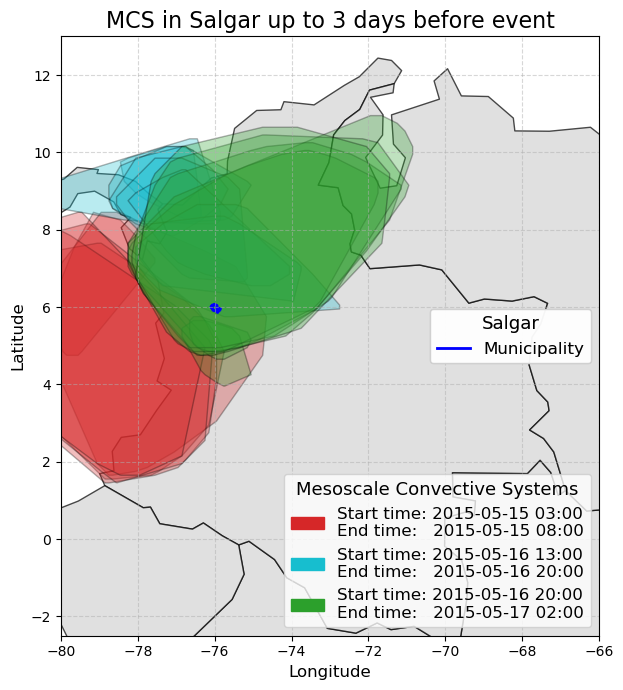

In [64]:

## Crear un mapa base de Sudamérica
## se descarga este dataset de los paises

# world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')  # Cambia el nombre si es distinto

# # Filtrar los países de interés (usando otro dataset para nombres de países)
# # Filtrar los países de interés
# paises_interes = ['Colombia', 'Venezuela', 'Ecuador', 'Peru', 'Brazil', 'Panama']
# norte_suramerica = world[world['NAME'].isin(paises_interes)]

# # Agregar el shape de un municipio
# codigo_municipio2 = 5642  # CAMBIARRRRRRRR
# municipio_geom = casos_shp[casos_shp['mpio_cdpmp'] == codigo_municipio2]

# if municipio_geom.empty:
#     raise ValueError(f"No se encontró el municipio con código {codigo_municipio2}")

# # Crear un color único para cada track_id
# colors = list(mcolors.TABLEAU_COLORS.values())  # Paleta predefinida
# np.random.shuffle(colors)  # Barajar los colores

# # Crear el mapa
# fig, ax = plt.subplots(figsize=(7, 7))
# norte_suramerica.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7)  # Mapa base

# # Crear una lista para las entradas de la leyenda
# legend_entries = []

# # Graficar cada track_id con un color único
# for i, track_id in enumerate(track_ids):
#     sistema = gdf_sistemas[gdf_sistemas['track_id'] == track_id]
#     color = colors[i % len(colors)]  # Asignar un color (cíclico si hay más track_id que colores)
#     sistema.plot(ax=ax, color=color, alpha=0.3, edgecolor='black', label=f'System {track_id}')
    
#     # Obtener la hora de inicio y finalización del track_id
#     times = pd.to_datetime(sistema['time']).sort_values()
#     start_time = times.iloc[0].strftime('%Y-%m-%d %H:%M')  # Formato sin segundos
#     end_time = times.iloc[-1].strftime('%Y-%m-%d %H:%M')  # Formato sin segundos
    
#     # Crear una entrada para la leyenda
#     legend_entry = mpatches.Patch(color=color, 
#                                   label=f'Start time: {start_time}\nEnd time:   {end_time}')
#     legend_entries.append(legend_entry)

# # Graficar el municipio
# municipio_geom.plot(ax=ax, color='none', edgecolor='blue', linewidth=2, label='Municipality')  # Municipio
    
# # Configuración del mapa 
# ax.set_title('MCS in Salgar up to 3 days before event', fontsize=16)
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)
# ax.set_xlim([-80, -66])  # Ajustar los límites según tu necesidad (mapa col)
# ax.set_ylim([-2.5, 13])  # Ajustar los límites según tu necesidad (mapa col)
# plt.grid(True, linestyle="--", alpha=0.5)

# # Primera leyenda (sistemas MCS)
# first_legend = ax.legend(handles=legend_entries, loc='lower right', fontsize=12, 
#                          title="Mesoscale Convective Systems", title_fontsize=13)
# ax.add_artist(first_legend)


# # Segunda leyenda (municipio)
# municipio_legend = mlines.Line2D([], [], color='blue', linewidth=2, label='Municipality')
# second_legend = ax.legend(handles=[municipio_legend], loc='center right', fontsize=12, 
#                           title="Salgar", title_fontsize=13)
# ax.add_artist(second_legend)  # Agregar la segunda leyenda manualmente

# # Mostrar el mapa
# plt.tight_layout()

# plt.savefig('Resultados_graficas/Casos_estudio/Salgar/3rintento_MCS_3dAntes_sistemas.png', dpi=300)


# plt.show()


## Realizar el hietograma para lluvia de MCS.
Este hietograma tiene la particularidad de que se grafica la precipitación para cada polígono.
Entonces si un polígono de MCS sucede el mismo día que otro se ve reflejado en la gráfica.

Además se toma en cuenta es la precipitación media de los polígono que intersectaron al municipio porque no se tiene la info del lugar especifico que sería el municipio.

-> Se toman en cuenta los **30 días antes del evento de emergencia**


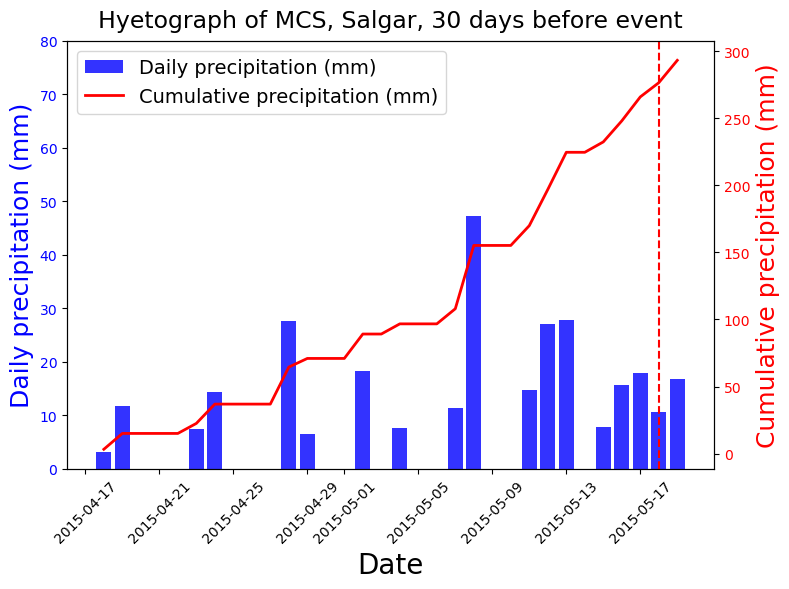

In [23]:
# #HIETOGRAMA DE MCS

# # Asegurarse de que la columna 'day' esté en formato datetime
# MCS_pol_totales['day'] = pd.to_datetime(MCS_pol_totales['day'])

# # Definir la fecha específica y el código del municipio (dos días despues)
# fecha_especifica = pd.to_datetime('2015-05-20')  # CAMBIAR
# codigo_municipio = 5642  # CAMBIAR

# # Calcular el rango de fechas (30 días antes)
# fecha_inicio = fecha_especifica - timedelta(days=32)

# # Filtrar el DataFrame para las fechas dentro del rango y el municipio específico
# MCS_filtrado = MCS_pol_totales[
#     (MCS_pol_totales['day'] >= fecha_inicio) & 
#     (MCS_pol_totales['day'] < fecha_especifica) & 
#     (MCS_pol_totales['cod_mpio'] == codigo_municipio)
# ]

# # Asegurarse de que 'day' esté en formato datetime
# MCS_filtrado.loc[:, 'day'] = pd.to_datetime(MCS_filtrado['day'])

# # Agrupar por día y sumar la lluvia promedio diaria
# lluvia_diaria = MCS_filtrado.groupby('day')['mean_p'].sum()

# # Crear un índice de fechas continuo (incluye días sin datos)
# rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_especifica - timedelta(days=1), freq='D')
# lluvia_diaria = lluvia_diaria.reindex(rango_fechas, fill_value=0)

# # Calcular la lluvia acumulada
# lluvia_acumulada = lluvia_diaria.cumsum()

# # Crear la figura y los ejes
# fig, ax1 = plt.subplots(figsize=(8, 6))

# # Graficar la lluvia diaria como barras
# color_barras = 'blue'
# ax1.bar(lluvia_diaria.index, lluvia_diaria, color=color_barras, label='Daily precipitation (mm)', alpha=0.8)
# ax1.set_xlabel('Date', fontsize=20)
# ax1.set_ylabel('Daily precipitation (mm)', fontsize=18, color=color_barras)
# ax1.tick_params(axis='y', labelcolor=color_barras)

# # Conversión explícita de datos
# x_vals = lluvia_diaria.index.to_numpy()  # Asegurar índice continuo
# y_vals = lluvia_acumulada.values  # Convertir valores a array

# # Crear un segundo eje Y para la lluvia acumulada
# ax2 = ax1.twinx()

# color_linea = 'red'
# ax2.plot(x_vals, y_vals, color=color_linea, linewidth=2, label='Cumulative precipitation (mm)')
# ax2.set_ylabel('Cumulative precipitation (mm)', fontsize=18, color=color_linea)
# ax2.tick_params(axis='y', labelcolor=color_linea)

# # Títulos y rotación de las etiquetas del eje X
# plt.title('Hyetograph of MCS, Salgar, 30 days before event', fontsize=17, pad=10)
# ax1.tick_params(axis='x', rotation=45)

# # Ajustar límites del eje Y izquierdo
# ax1.set_ylim(0, 80)

# # Agregar una línea vertical moteada para un día específico
# event_day = pd.Timestamp('2015-05-18')  # CAMBIAR POR CASO
# ax1.axvline(event_day, color='red', linestyle='--', linewidth=1.5)

# # Combinar las leyendas
# handles_barra, labels_barra = ax1.get_legend_handles_labels()
# handles_linea, labels_linea = ax2.get_legend_handles_labels()

# # Agregar ambas leyendas al eje ax1
# ax1.legend(handles_barra + handles_linea, labels_barra + labels_linea, loc='upper left', fontsize=14)



# # Ajustar la disposición del gráfico
# fig.tight_layout()

# plt.savefig('Resultados_graficas/Casos_estudio/Salgar/Hyetograph_MCS_daily.png', dpi=300)

# # Mostrar el gráfico
# plt.show()


### Hietograma para el municipio del desastre
##### Este hietograma es general de precipitación (no exclusivo de MCS) para el municipio del desastre 30 días antes del desastre

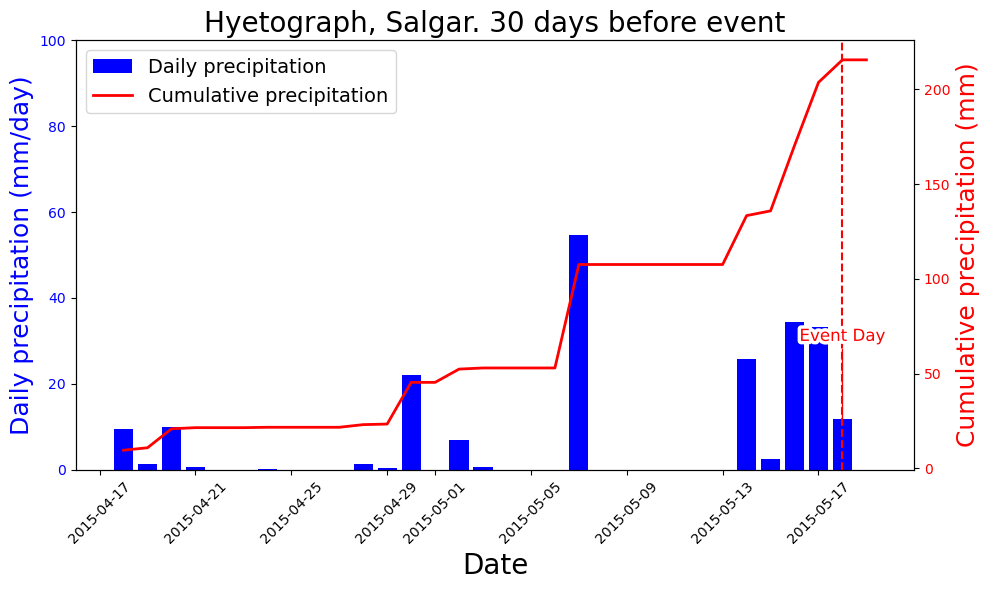

In [25]:
# #Hietograma para estación de ideam

# #REALIZAMOS HIETOGRAMA PARA 30 días antes del desastre


# # Cargar los datos 
# datos_pp = pd.read_csv("Datos_desastres/Salgar_pp.csv")

# # Asegurarse de que 'Fecha' está en formato datetime
# datos_pp['Fecha'] = pd.to_datetime(datos_pp['Fecha'])

# #Filtrar datos para un rango de tiempo (CAMBIARRRRRRR)
# fecha_inicio = '2015-04-18'
# fecha_fin = '2015-05-19' #UN DÍA DESPUÉS DEL SUCESO

# # Filtrar datos dentro del rango de fechas
# datos_pp_rango = datos_pp[(datos_pp['Fecha'] >= fecha_inicio) & (datos_pp['Fecha'] <= fecha_fin)]

# # Establecer 'Fecha' como índice
# datos_pp_rango.set_index('Fecha', inplace=True)

# # Ordenar los datos por fecha
# datos_pp_rango.sort_index(inplace=True)

# # Crear un rango continuo de fechas y reindexar
# rango_completo = pd.date_range(start=fecha_inicio, end=fecha_fin)
# datos_pp_rango = datos_pp_rango.reindex(rango_completo, fill_value=0)

# # Convertir a precipitación diaria y calcular la precipitación acumulada
# precipitacion_diaria = datos_pp_rango['Valor']
# precipitacion_acumulada = precipitacion_diaria.cumsum()

# # Asegúrate de que el índice es datetime
# if not isinstance(precipitacion_acumulada.index, pd.DatetimeIndex):
#     precipitacion_acumulada.index = pd.to_datetime(precipitacion_acumulada.index)

# # Conversión explícita de datos (por si acaso)
# x_vals = precipitacion_acumulada.index.to_numpy()  # Convertir índice a array de numpy
# y_vals = precipitacion_acumulada.values  # Convertir valores a array de numpy

# # Crear figura y ejes
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Graficar precipitación diaria como barras
# color = 'blue'
# barra = ax1.bar(precipitacion_diaria.index, precipitacion_diaria, color=color, label='Daily precipitation')
# ax1.set_xlabel('Date', size=20)
# ax1.set_ylabel('Daily precipitation (mm/day)',size=18, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# #Ajustar límites del eje Y izquierdo
# ax1.set_ylim(0,100)

# # Crear un segundo eje y para la precipitación acumulada
# ax2 = ax1.twinx()
# color_linea = 'red'
# linea = ax2.plot(x_vals,y_vals, 
#                  color=color_linea, linewidth=2, label='Cumulative precipitation')
# ax2.set_ylabel('Cumulative precipitation (mm)', size=18, color=color_linea)
# ax2.tick_params(axis='y', labelcolor=color_linea)

# # Rotar las etiquetas del eje x directamente en el objeto ax1
# ax1.tick_params(axis='x', rotation=45)

# # Agregar una línea vertical moteada para un día específico
# event_day = pd.Timestamp('2015-05-18')  # CAMBIAR POR CASO
# ax1.axvline(event_day, color='red', linestyle='--', linewidth=1.5)

# ### Agregar texto en el medio de la línea vertical
# text = ax1.annotate('Event Day', 
#                     xy=(event_day, 10),  # Coordenadas del texto
#                     xytext=(event_day, 30),  # Posición ajustada del texto
#                     fontsize=12, color='red', ha='center',
#                     arrowprops=dict(arrowstyle='-', color='red', lw=1))
# # Aplicar un contorno blanco al texto
# text.set_path_effects([
#     path_effects.Stroke(linewidth=5, foreground='white'),  # Contorno negro
#     path_effects.Normal()  # Texto normal encima del contorno
# ])




# # Agregar título a la gráfica
# plt.title('Hyetograph, Salgar. 30 days before event', size=20)

# # Combinar las leyendas
# handles_barra, labels_barra = ax1.get_legend_handles_labels()
# handles_linea, labels_linea = ax2.get_legend_handles_labels()


# #Agregar ambas leyendas al eje ax1
# ax1.legend(handles_barra + handles_linea, labels_barra + labels_linea, loc='upper left', fontsize=14)

# # Ajustar disposición del gráfico
# fig.tight_layout()

# plt.savefig('Resultados_graficas/Casos_estudio/Salgar/Hyetograph_daily.png', dpi=300)

# # Mostrar gráfico
# plt.show()

